# EDA Analisis

## Import Libraries:

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np


## Input cleaned Csvs.

In [155]:
coin_id_df = pd.read_csv('../Csvs_cleanned/coin_id.csv')
coins_global_trends_df = pd.read_csv('../Csvs_cleanned/coins_global_trends.csv')
# normalized_tickers_resume_df = pd.read_csv('../Csvs_cleanned/normalized_tickers_resume.csv')
ohlc_prices_df = pd.read_csv('../Csvs_cleanned/ohlc_prices.csv')
prices_df = pd.read_csv('../Csvs_cleanned/prices.csv')
# prices_normalized_df = pd.read_csv('../Csvs_cleanned/prices_normalized.csv')
ranking_coingecko_df = pd.read_csv('../Csvs_cleanned/ranking_coingecko.csv')
tickers_resume_df = pd.read_csv('../Csvs_cleanned/tickers_resume.csv')
top_criptos_df = pd.read_csv('../Csvs_cleanned/top_criptos.csv')

### coin_id_df:

In [156]:
coin_id_df.head(15)

,crip_id,symbol,name
0,apecoin,ape,apecoin
1,apemove,ape,apemove
2,astar,astr,astar
3,binancecoin,bnb,bnb
4,binance-coin-wormhole,bnb,binance coin (wormhole)
5,binance-peg-cardano,ada,binance-peg cardano
6,binance-peg-dogecoin,doge,binance-peg dogecoin
7,binance-peg-xrp,xrp,binance-peg xrp
8,bitcoin,btc,bitcoin
9,bitrock,brock,bitrock


### coins_global_trends_df:

In [157]:
coins_global_trends_df.head(15)

,crip_id,coin_id,name,symbol,market_cap_rank,thumb,small,large,slug,price_btc,score
0,apecoin,24383,apecoin,ape,68,https://assets.coingecko.com/coins/images/2438...,https://assets.coingecko.com/coins/images/2438...,https://assets.coingecko.com/coins/images/2438...,apecoin,0.000056,0
1,trust-wallet-token,11085,trust wallet,twt,100,https://assets.coingecko.com/coins/images/1108...,https://assets.coingecko.com/coins/images/1108...,https://assets.coingecko.com/coins/images/1108...,trust-wallet-token,0.000033,1
2,hourglass,27516,hourglass,wait,645,https://assets.coingecko.com/coins/images/2751...,https://assets.coingecko.com/coins/images/2751...,https://assets.coingecko.com/coins/images/2751...,hourglass,0.000008,2
3,sei-network,28205,sei,sei,120,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,https://assets.coingecko.com/coins/images/2820...,sei,0.000006,3
4,pendle,15069,pendle,pendle,343,https://assets.coingecko.com/coins/images/1506...,https://assets.coingecko.com/coins/images/1506...,https://assets.coingecko.com/coins/images/1506...,pendle,0.000023,4
5,rollbit-coin,24552,rollbit coin,rlb,73,https://assets.coingecko.com/coins/images/2455...,https://assets.coingecko.com/coins/images/2455...,https://assets.coingecko.com/coins/images/2455...,rollbit-coin,0.000006,5
6,akash-network,12785,akash network,akt,104,https://assets.coingecko.com/coins/images/1278...,https://assets.coingecko.com/coins/images/1278...,https://assets.coingecko.com/coins/images/1278...,akash-network,0.000056,6
7,worldcoin-wld,31069,worldcoin,wld,170,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,https://assets.coingecko.com/coins/images/3106...,worldcoin,0.000053,7


In [158]:
coins_global_trends_df = coins_global_trends_df[['crip_id','name','market_cap_rank','price_btc','score']]

In [159]:
# Ordenar el DataFrame por la columna 'score' de manera descendente
sorted_coins_global_trends_df = coins_global_trends_df.sort_values(by='score', ascending=True)


In [160]:
sorted_coins_global_trends_df.head()

,crip_id,name,market_cap_rank,price_btc,score
0,apecoin,apecoin,68,0.000056,0
1,trust-wallet-token,trust wallet,100,0.000033,1
2,hourglass,hourglass,645,0.000008,2
3,sei-network,sei,120,0.000006,3
4,pendle,pendle,343,0.000023,4


### ohlc_prices_df:

Debe conbinarce con price

In [161]:
ohlc_prices_df.head(15)

,timestamp,open_price,high_price,low_price,close_price,crip_id
0,2023-07-25 00:00:00,238.46732,238.46732,238.46732,238.46732,binancecoin
1,2023-07-25 04:00:00,238.96549,239.32873,238.81948,239.32873,binancecoin
2,2023-07-25 08:00:00,238.36177,238.36177,237.23125,237.23125,binancecoin
3,2023-07-25 12:00:00,237.13460,238.51009,237.13460,237.72424,binancecoin
4,2023-07-25 16:00:00,237.57690,237.99806,237.00574,237.00574,binancecoin
5,2023-07-25 20:00:00,237.25912,237.76061,237.25912,237.62638,binancecoin
6,2023-07-26 00:00:00,237.18989,237.89039,237.18989,237.89039,binancecoin
7,2023-07-26 04:00:00,237.73035,237.73035,237.07513,237.37156,binancecoin
8,2023-07-26 08:00:00,238.28996,238.35576,237.96049,238.07238,binancecoin
9,2023-07-26 12:00:00,237.59065,237.62301,237.22629,237.55819,binancecoin


In [162]:
ohlc_prices_df.shape

(7173, 6)

In [163]:
ohlc_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7173 entries, 0 to 7172
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    7173 non-null   object 
 1   open_price   7173 non-null   float64
 2   high_price   7173 non-null   float64
 3   low_price    7173 non-null   float64
 4   close_price  7173 non-null   float64
 5   crip_id      7173 non-null   object 
dtypes: float64(4), object(2)
memory usage: 336.4+ KB


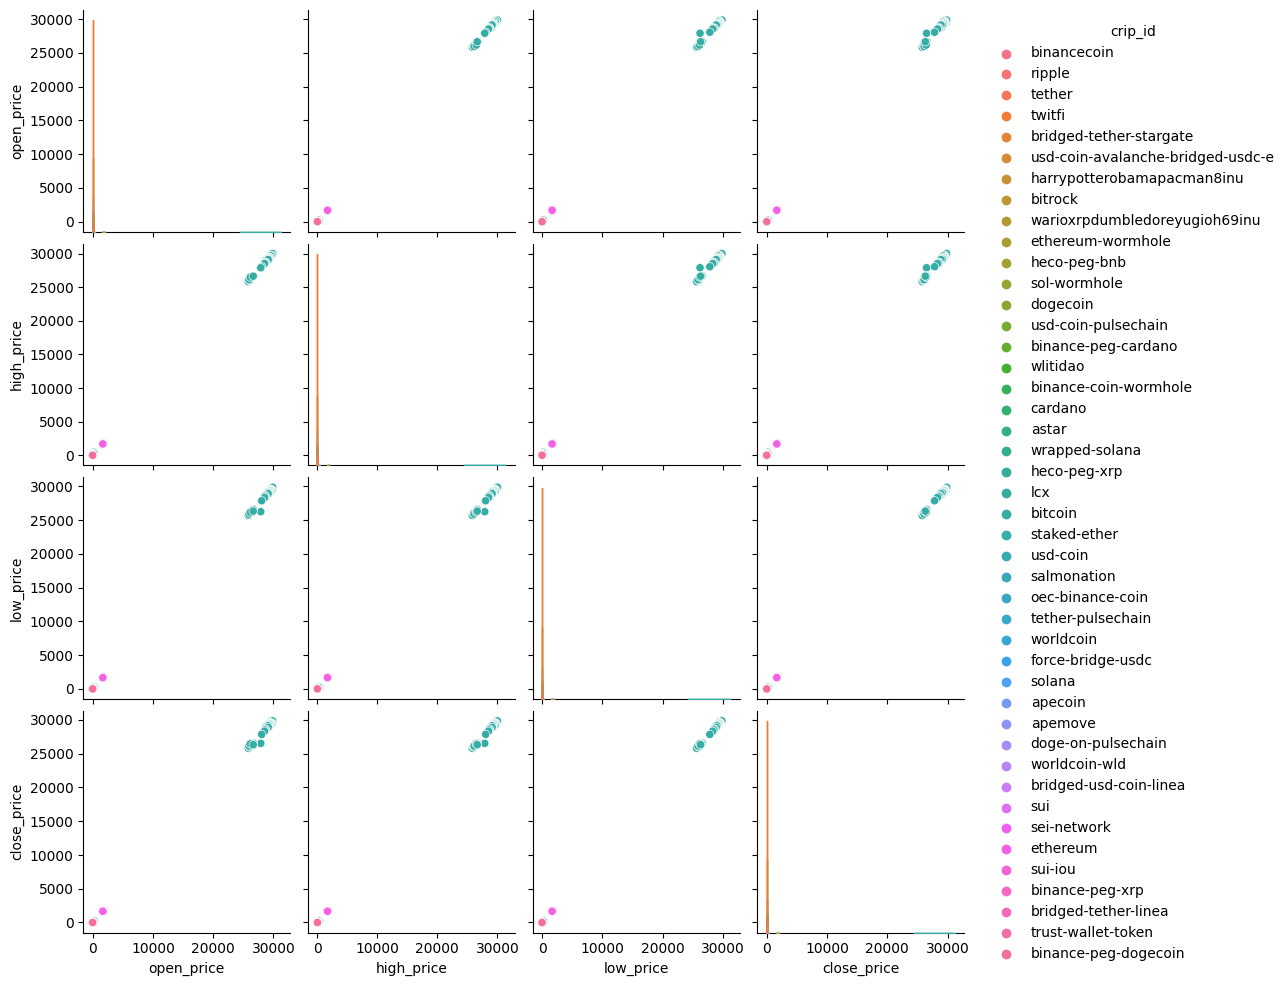

In [164]:
sns.pairplot(ohlc_prices_df, hue='crip_id')

In [165]:
# Convertir la columna 'timestamp' a tipo datetime
ohlc_prices_df['timestamp'] = pd.to_datetime(ohlc_prices_df['timestamp'])

# Ordenar el DataFrame por 'crip_id' y 'timestamp'
ohlc_prices_df = ohlc_prices_df.sort_values(by=['crip_id', 'timestamp'])

# Calcular los incrementos respecto al valor anterior para las columnas de precio
price_columns = ['open_price', 'high_price', 'low_price', 'close_price']
for column in price_columns:
    ohlc_prices_df[f'{column}_increment'] = ohlc_prices_df.groupby('crip_id')[column].diff()

In [184]:
ohlc_prices_df.head(5)

,timestamp,open_price,high_price,low_price,close_price,crip_id,open_price_increment,high_price_increment,low_price_increment,close_price_increment
5226,2023-07-25 00:00:00,2.03251,2.03251,2.03251,2.03251,apecoin,0.00000,0.00000,0.00000,0.00000
5227,2023-07-25 04:00:00,2.03483,2.04255,2.02951,2.04255,apecoin,0.00232,0.01004,-0.00300,0.01004
5228,2023-07-25 08:00:00,2.03342,2.03342,2.01183,2.01183,apecoin,-0.00141,-0.00913,-0.01768,-0.03072
5229,2023-07-25 12:00:00,2.00321,2.03448,2.00321,2.03206,apecoin,-0.03021,0.00106,-0.00862,0.02023
5230,2023-07-25 16:00:00,2.02903,2.02903,2.00996,2.00996,apecoin,0.02582,-0.00545,0.00675,-0.02210


In [167]:
ohlc_prices_df = ohlc_prices_df.fillna(0)

In [168]:
ohlc_prices_df.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/ohlc_prices_df_increments.csv', mode='w', index=False)

In [169]:
ohlc_prices_df.head(5)

,timestamp,open_price,high_price,low_price,close_price,crip_id,open_price_increment,high_price_increment,low_price_increment,close_price_increment
5226,2023-07-25 00:00:00,2.03251,2.03251,2.03251,2.03251,apecoin,0.00000,0.00000,0.00000,0.00000
5227,2023-07-25 04:00:00,2.03483,2.04255,2.02951,2.04255,apecoin,0.00232,0.01004,-0.00300,0.01004
5228,2023-07-25 08:00:00,2.03342,2.03342,2.01183,2.01183,apecoin,-0.00141,-0.00913,-0.01768,-0.03072
5229,2023-07-25 12:00:00,2.00321,2.03448,2.00321,2.03206,apecoin,-0.03021,0.00106,-0.00862,0.02023
5230,2023-07-25 16:00:00,2.02903,2.02903,2.00996,2.00996,apecoin,0.02582,-0.00545,0.00675,-0.02210


### prices_df:

In [170]:
prices_df.head(15)

,crip_id,timestamp,price,market_cap,total_volume
0,binancecoin,2023-03-14 00:00:00,308.71850,4.874227e+10,1.335819e+09
1,binancecoin,2023-03-15 00:00:00,309.57617,4.889730e+10,1.256202e+09
2,binancecoin,2023-03-16 00:00:00,307.72014,4.855182e+10,9.601658e+08
3,binancecoin,2023-03-17 00:00:00,331.52890,5.239140e+10,2.047768e+09
4,binancecoin,2023-03-18 00:00:00,339.76379,5.356016e+10,1.414370e+09
5,binancecoin,2023-03-19 00:00:00,333.03173,5.257226e+10,1.170238e+09
6,binancecoin,2023-03-20 00:00:00,337.45215,5.358586e+10,1.119946e+09
7,binancecoin,2023-03-21 00:00:00,335.59511,5.293790e+10,9.714148e+08
8,binancecoin,2023-03-22 00:00:00,336.89285,5.320156e+10,7.019832e+08
9,binancecoin,2023-03-23 00:00:00,323.60131,5.109016e+10,1.814264e+09


In [171]:
prices_df.shape

(5719, 5)

In [172]:
# Convertir la columna 'timestamp' a tipo datetime
prices_df['timestamp'] = pd.to_datetime(prices_df['timestamp'])

# Ordenar el DataFrame por 'crip_id' y 'timestamp'
prices_df = prices_df.sort_values(by=['crip_id', 'timestamp'])

# Calcular los incrementos respecto al valor anterior para la columna 'price'
prices_df['price_increment'] = prices_df.groupby('crip_id')['price'].diff()

In [173]:
prices_df = prices_df.fillna(0)

In [174]:
prices_df.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/prices_df_increments.csv', mode='w',index=False)

In [175]:

prices_df.head(167)

,crip_id,timestamp,price,market_cap,total_volume,price_increment
4378,apecoin,2023-03-14 00:00:00,4.45117,1.646583e+09,2.127908e+08,0.00000
4379,apecoin,2023-03-15 00:00:00,4.29034,1.586404e+09,1.939536e+08,-0.16083
4380,apecoin,2023-03-16 00:00:00,4.11244,1.516480e+09,1.965822e+08,-0.17790
4381,apecoin,2023-03-17 00:00:00,4.14067,1.524868e+09,1.673132e+08,0.02823
4382,apecoin,2023-03-18 00:00:00,4.46472,1.641717e+09,1.962635e+08,0.32405
...,...,...,...,...,...,...
4540,apecoin,2023-08-23 00:00:00,1.50018,5.533520e+08,7.942951e+07,-0.03776
4541,apecoin,2023-08-23 22:14:23,1.50052,5.527127e+08,8.098046e+07,0.00034
4542,apemove,2023-03-14 00:00:00,0.00568,1.108122e+04,4.223508e+01,0.00000
4543,apemove,2023-03-15 00:00:00,0.00563,1.094368e+04,3.790608e+01,-0.00005


In [176]:
# sns.pairplot(prices_df, hue='crip_id')

### Merged Ohlc_prices_df y Prices_df:

##### Merge

In [177]:
# Realizar el merge utilizando 'crip_id' y 'date'
merged_df_ohlc_prices_df_and_prices_df = pd.merge(ohlc_prices_df, prices_df, on=['crip_id', 'timestamp'])

In [178]:
merged_df_ohlc_prices_df_and_prices_df.head(10)

,timestamp,open_price,high_price,low_price,close_price,crip_id,open_price_increment,high_price_increment,low_price_increment,close_price_increment,price,market_cap,total_volume,price_increment
0,2023-07-25,2.03251,2.03251,2.03251,2.03251,apecoin,0.00000,0.00000,0.00000,0.00000,2.03483,749830850.0,124816730.0,-0.06341
1,2023-07-26,2.01271,2.01271,1.99036,2.00842,apecoin,-0.00059,-0.00385,-0.02056,-0.00250,1.99242,733965500.0,88668000.0,-0.04241
2,2023-07-27,1.99772,2.01009,1.99136,1.99136,apecoin,-0.00040,0.00933,0.02316,-0.00940,1.99535,734585800.0,72747130.0,0.00293
3,2023-07-28,1.99253,1.99253,1.97846,1.98289,apecoin,-0.00584,-0.01644,-0.01819,-0.02608,1.96932,726197570.0,50090304.0,-0.02603
4,2023-07-29,1.97485,1.97485,1.97017,1.97017,apecoin,-0.00703,-0.01146,0.00257,-0.00311,1.97094,726365100.0,50508024.0,0.00162
5,2023-07-30,1.97570,1.97789,1.97299,1.97501,apecoin,0.00344,0.00295,0.00411,0.00348,1.97469,727635000.0,32012736.0,0.00375
6,2023-07-31,1.90242,1.90242,1.88294,1.88294,apecoin,-0.04522,-0.04522,-0.05406,-0.05614,1.89909,700452700.0,51747904.0,-0.07560
7,2023-08-01,1.86913,1.86913,1.84439,1.85126,apecoin,-0.00813,-0.02320,-0.03287,-0.03304,1.85864,685457800.0,57075024.0,-0.04045
8,2023-08-02,1.83194,1.83194,1.82172,1.82776,apecoin,0.02942,0.01535,0.02087,0.01117,1.83956,676547900.0,74842640.0,-0.01908
9,2023-08-03,1.79080,1.79131,1.78864,1.78864,apecoin,-0.00304,-0.00253,0.01472,0.00218,1.78587,658768960.0,50592080.0,-0.05369


In [180]:
merged_df_ohlc_prices_df_and_prices_df.shape

(1189, 14)

In [181]:
# sns.pairplot(merged_df_ohlc_prices_df_and_prices_df,hue='crip_id')

##### Guardo merged_df_ohlc_prices_df_and_prices_df:

In [182]:
merged_df_ohlc_prices_df_and_prices_df.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/merged_df_ohlc_prices_df_and_prices_df.csv', mode='w', index=False)

##### merged_df_ohlc_prices_df_and_prices_df % :

In [104]:
# Calculate percentage change for the specified columns
percentage_columns = ["open_price", "high_price", "low_price", "close_price", "price", 'market_cap', 'total_volume']
for col in percentage_columns:
    col_name = f"{col}_change"
    merged_df_ohlc_prices_df_and_prices_df[col_name] = merged_df_ohlc_prices_df_and_prices_df[col].pct_change() * 100

# Display the resulting DataFrame
print(merged_df_ohlc_prices_df_and_prices_df.head(10))


   crip_id  timestamp  open_price  high_price  low_price  close_price  \
0  apecoin 2023-07-25     2.03251     2.03251    2.03251      2.03251   
1  apecoin 2023-07-26     2.01271     2.01271    1.99036      2.00842   
2  apecoin 2023-07-27     1.99772     2.01009    1.99136      1.99136   
3  apecoin 2023-07-28     1.99253     1.99253    1.97846      1.98289   
4  apecoin 2023-07-29     1.97485     1.97485    1.97017      1.97017   
5  apecoin 2023-07-30     1.97570     1.97789    1.97299      1.97501   
6  apecoin 2023-07-31     1.90242     1.90242    1.88294      1.88294   
7  apecoin 2023-08-01     1.86913     1.86913    1.84439      1.85126   
8  apecoin 2023-08-02     1.83194     1.83194    1.82172      1.82776   
9  apecoin 2023-08-03     1.79080     1.79131    1.78864      1.78864   

     price   market_cap  total_volume  open_price_change  high_price_change  \
0  2.03483  749830850.0   124816730.0                NaN                NaN   
1  1.99242  733965500.0    88668000.0 

In [105]:
# Display the resulting DataFrame
merged_df_ohlc_prices_df_and_prices_df.shape

(1189, 16)

In [23]:
# sns.pairplot(merged_df_ohlc_prices_df_and_prices_df, hue='crip_id')

### ranking_coingecko_df:

In [120]:
ranking_coingecko_df.head(15)

,crip_id,block_time_in_minutes,sentiment_votes_up_percentage,sentiment_votes_down_percentage,watchlist_portfolio_users,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,asset_platform_id,public_notice
0,binancecoin,0,57.45,42.55,642873,4.0,5.0,65.446,73.082,61.771,73.073,11.364,2023-08-23 22:02:24.937000+00:00,NaN,NaN
1,ripple,0,78.26,21.74,569215,5.0,3.0,66.223,83.005,51.794,81.070,0.022,2023-08-23 22:02:55.032000+00:00,NaN,NaN
2,tether,0,45.00,55.00,284231,3.0,150.0,41.416,0.000,10.685,101.651,0.029,2023-08-23 22:00:00.560000+00:00,ethereum,tether announced the ending of the support of ...
3,twitfi,0,0.00,0.00,384,0.0,0.0,0.000,0.000,0.000,0.000,0.000,2023-08-23 22:01:48.820000+00:00,ethereum,NaN
4,bridged-tether-stargate,0,0.00,0.00,31,0.0,0.0,0.000,0.000,0.000,0.000,0.000,2023-08-23 22:02:50.631000+00:00,fantom,NaN
5,usd-coin-avalanche-bridged-usdc-e,0,0.00,0.00,477,0.0,3452.0,7.981,0.000,0.000,39.897,0.033,2023-08-23 22:02:53.825000+00:00,avalanche,NaN
6,harrypotterobamapacman8inu,0,75.00,25.00,740,375.0,0.0,0.000,0.000,0.000,0.000,0.000,2023-08-23 22:02:24.749000+00:00,ethereum,NaN
7,bitrock,0,95.75,4.25,2694,835.0,0.0,0.000,0.000,0.000,0.000,0.000,2023-08-23 22:02:24.793000+00:00,ethereum,NaN
8,warioxrpdumbledoreyugioh69inu,0,0.00,0.00,51,0.0,0.0,0.000,0.000,0.000,0.000,0.000,2023-08-22 09:00:24.142000+00:00,ethereum,NaN
9,ethereum-wormhole,0,0.00,0.00,523,0.0,3227.0,9.620,0.000,9.446,37.710,0.003,2023-08-23 22:03:09.118000+00:00,solana,NaN


In [119]:
ranking_coingecko_df.shape

(46, 15)

In [118]:
ranking_coingecko_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   crip_id                          46 non-null     object 
 1   block_time_in_minutes            46 non-null     int64  
 2   sentiment_votes_up_percentage    46 non-null     float64
 3   sentiment_votes_down_percentage  46 non-null     float64
 4   watchlist_portfolio_users        46 non-null     int64  
 5   market_cap_rank                  46 non-null     float64
 6   coingecko_rank                   46 non-null     float64
 7   coingecko_score                  46 non-null     float64
 8   developer_score                  46 non-null     float64
 9   community_score                  46 non-null     float64
 10  liquidity_score                  46 non-null     float64
 11  public_interest_score            46 non-null     float64
 12  last_updated            

In [117]:
ranking_coingecko_df.head()

,crip_id,block_time_in_minutes,sentiment_votes_up_percentage,sentiment_votes_down_percentage,watchlist_portfolio_users,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,asset_platform_id,public_notice
0,binancecoin,0,57.45,42.55,642873,4.0,5.0,65.446,73.082,61.771,73.073,11.364,2023-08-23 22:02:24.937000+00:00,NaN,NaN
1,ripple,0,78.26,21.74,569215,5.0,3.0,66.223,83.005,51.794,81.070,0.022,2023-08-23 22:02:55.032000+00:00,NaN,NaN
2,tether,0,45.00,55.00,284231,3.0,150.0,41.416,0.000,10.685,101.651,0.029,2023-08-23 22:00:00.560000+00:00,ethereum,tether announced the ending of the support of ...
3,twitfi,0,0.00,0.00,384,0.0,0.0,0.000,0.000,0.000,0.000,0.000,2023-08-23 22:01:48.820000+00:00,ethereum,NaN
4,bridged-tether-stargate,0,0.00,0.00,31,0.0,0.0,0.000,0.000,0.000,0.000,0.000,2023-08-23 22:02:50.631000+00:00,fantom,NaN


In [29]:
# sns.pairplot(ranking_coingecko_df,hue='crip_id')

### Merged with ranking_congecko_df: Solo se puede por crip_id

In [30]:
# Realizar el merge utilizando 'crip_id' y 'date'
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df = pd.merge(merged_df_ohlc_prices_df_and_prices_df, ranking_coingecko_df, on=['crip_id'])

In [31]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.head(5)

,crip_id,timestamp,open_price,high_price,low_price,close_price,price,market_cap,total_volume,open_price_change,...,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,asset_platform_id,public_notice
0,binancecoin,2023-07-25 00:00:00,238.46732,238.46732,238.46732,238.46732,238.96549,3.721616e+10,512795360.0,NaN,...,4.0,5.0,65.446,73.082,61.771,73.073,11.364,2023-08-23 22:02:24.937000+00:00,NaN,NaN
1,binancecoin,2023-07-26 00:00:00,237.18989,237.89039,237.18989,237.89039,237.73035,3.704822e+10,359635870.0,-0.535683,...,4.0,5.0,65.446,73.082,61.771,73.073,11.364,2023-08-23 22:02:24.937000+00:00,NaN,NaN
2,binancecoin,2023-07-27 00:00:00,238.56923,239.75073,238.56923,239.00026,239.02009,3.676842e+10,397845100.0,0.581534,...,4.0,5.0,65.446,73.082,61.771,73.073,11.364,2023-08-23 22:02:24.937000+00:00,NaN,NaN
3,binancecoin,2023-07-28 00:00:00,239.99016,240.50213,239.99016,240.28338,240.41737,3.697772e+10,385232400.0,0.595605,...,4.0,5.0,65.446,73.082,61.771,73.073,11.364,2023-08-23 22:02:24.937000+00:00,NaN,NaN
4,binancecoin,2023-07-29 00:00:00,242.70448,242.70448,242.11383,242.11383,241.85783,3.722228e+10,300273000.0,1.131013,...,4.0,5.0,65.446,73.082,61.771,73.073,11.364,2023-08-23 22:02:24.937000+00:00,NaN,NaN


In [32]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.shape

(1249, 30)

In [33]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [34]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.head(5)

,crip_id,timestamp,open_price,high_price,low_price,close_price,price,market_cap,total_volume,open_price_change,high_price_change,low_price_change,close_price_change,price_change,market_cap_change,total_volume_change,block_time_in_minutes,sentiment_votes_up_percentage,sentiment_votes_down_percentage,watchlist_portfolio_users,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,asset_platform_id,public_notice
0,binancecoin,2023-07-25 00:00:00,238.46732,238.46732,238.46732,238.46732,238.96549,3.721616e+10,512795360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,57.45,42.55,642873,4.0,5.0,65.446,73.082,61.771,73.073,11.364,2023-08-23 22:02:24.937000+00:00,NaN,NaN
1,binancecoin,2023-07-26 00:00:00,237.18989,237.89039,237.18989,237.89039,237.73035,3.704822e+10,359635870.0,-0.535683,-0.241933,-0.535683,-0.241933,-0.516870,-0.451256,-29.867565,0,57.45,42.55,642873,4.0,5.0,65.446,73.082,61.771,73.073,11.364,2023-08-23 22:02:24.937000+00:00,NaN,NaN
2,binancecoin,2023-07-27 00:00:00,238.56923,239.75073,238.56923,239.00026,239.02009,3.676842e+10,397845100.0,0.581534,0.782016,0.581534,0.466547,0.542522,-0.755221,10.624421,0,57.45,42.55,642873,4.0,5.0,65.446,73.082,61.771,73.073,11.364,2023-08-23 22:02:24.937000+00:00,NaN,NaN
3,binancecoin,2023-07-28 00:00:00,239.99016,240.50213,239.99016,240.28338,240.41737,3.697772e+10,385232400.0,0.595605,0.313409,0.595605,0.536870,0.584587,0.569219,-3.170254,0,57.45,42.55,642873,4.0,5.0,65.446,73.082,61.771,73.073,11.364,2023-08-23 22:02:24.937000+00:00,NaN,NaN
4,binancecoin,2023-07-29 00:00:00,242.70448,242.70448,242.11383,242.11383,241.85783,3.722228e+10,300273000.0,1.131013,0.915730,0.884899,0.761788,0.599150,0.661371,-22.054064,0,57.45,42.55,642873,4.0,5.0,65.446,73.082,61.771,73.073,11.364,2023-08-23 22:02:24.937000+00:00,NaN,NaN


In [35]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df = merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.drop_duplicates()

In [36]:
# Contar la cantidad de veces que aparece cada valor único en 'Columna'
count_crip_id_merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df = merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df['crip_id'].value_counts()

In [37]:
print(count_crip_id_merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df)

crip_id
bitcoin                              60
solana                               30
lcx                                  30
ripple                               30
staked-ether                         30
usd-coin                             30
tether-pulsechain                    30
worldcoin                            30
force-bridge-usdc                    30
apecoin                              30
wrapped-solana                       30
doge-on-pulsechain                   30
worldcoin-wld                        30
sui                                  30
ethereum                             30
sui-iou                              30
binance-peg-xrp                      30
trust-wallet-token                   30
heco-peg-xrp                         30
binancecoin                          30
astar                                30
sol-wormhole                         30
tether                               30
twitfi                               30
usd-coin-avalanche-bridged-usdc-

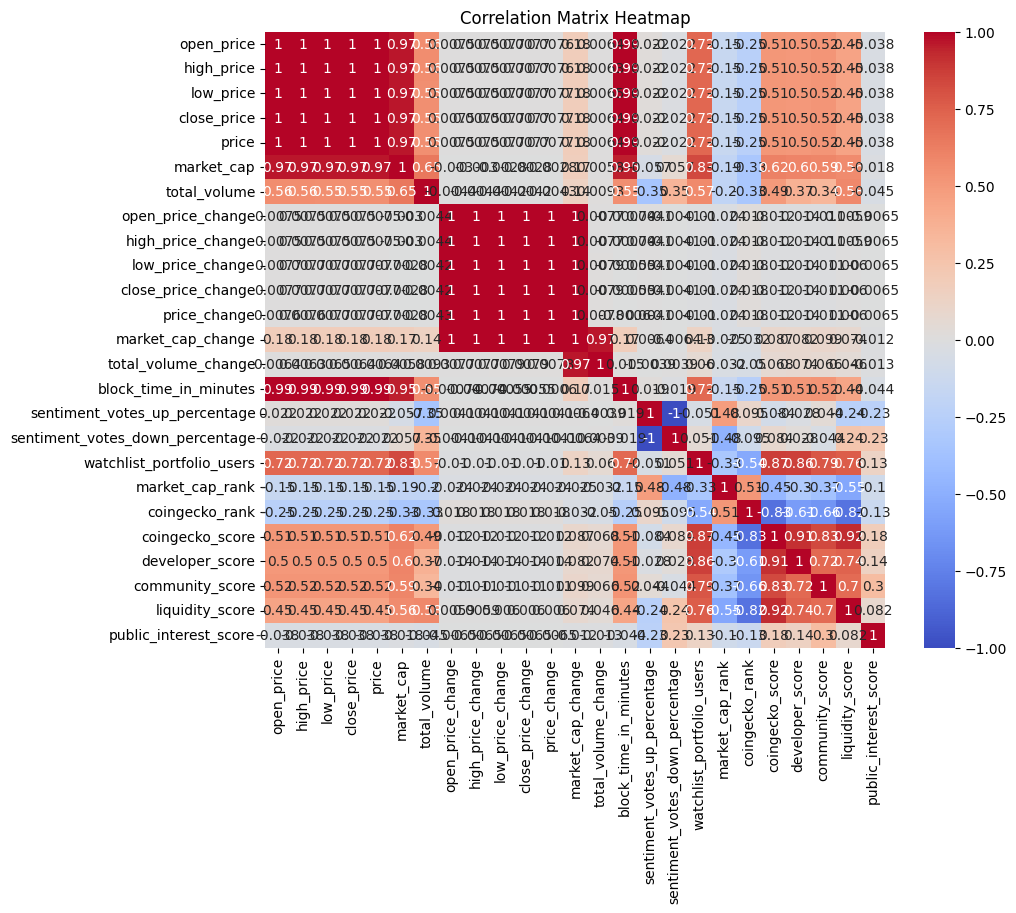

In [38]:
# Seleccionar solo las columnas numéricas para el cálculo de correlación
numeric_columns = merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()



___________________________________________________________________

### Experimentando otro poco

In [121]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1219 entries, 0 to 1248
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   crip_id                          1219 non-null   object 
 1   timestamp                        1219 non-null   object 
 2   open_price                       1219 non-null   float64
 3   high_price                       1219 non-null   float64
 4   low_price                        1219 non-null   float64
 5   close_price                      1219 non-null   float64
 6   price                            1219 non-null   float64
 7   market_cap                       1219 non-null   float64
 8   total_volume                     1219 non-null   float64
 9   open_price_change                1189 non-null   float64
 10  high_price_change                1189 non-null   float64
 11  low_price_change                 1189 non-null   float64
 12  close_price_change       

________________________________________________________________________________

### tickers_resume_df:

In [122]:
tickers_resume_df.head(10)

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,crip_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,bnb,usdt,216.2000,78282.957000,green,0.046253,2023-08-24 01:56:46,2023-08-24 01:56:46,2023-08-24 01:56:46,False,False,not founded trade_url #404,not founded token_info_url #404,binancecoin,tether,p2b,p2pb2b,0.008200,0.129231,216.31,641.919000,10117.000,16933273.0
1,bnb,usdt,216.3100,43388.429840,green,0.019246,2023-08-24 01:57:31,2023-08-24 01:57:31,2023-08-24 01:57:31,False,False,https://dashboard.azbit.com/exchange/bnb_usdt,not founded token_info_url #404,binancecoin,tether,azbit,azbit,0.008204,0.129297,216.26,354.678000,5590.000,9349370.0
2,bnb,usdt,216.1000,4743.360000,green,0.046253,2023-08-24 01:56:56,2023-08-24 01:56:56,2023-08-24 01:56:56,False,False,https://www.mexc.com/exchange/bnb_usdt,not founded token_info_url #404,binancecoin,tether,mexc,mxc,0.008196,0.129171,216.21,38.877508,612.704,1025555.0
3,bnb,usdt,216.1000,542489.144000,green,0.046253,2023-08-24 01:58:39,2023-08-24 01:58:39,2023-08-24 01:58:39,False,False,https://www.binance.com/en/trade/bnb_usdt?ref=...,not founded token_info_url #404,binancecoin,tether,binance,binance,0.008196,0.129171,216.21,4436.000000,69914.000,117022590.0
4,bnb,usdt,216.0700,29547.163212,green,0.060130,2023-08-24 01:58:35,2023-08-24 01:58:35,2023-08-24 01:58:35,False,False,https://bingx.com/en-us/spot/bnbusdt,not founded token_info_url #404,binancecoin,tether,bingx,bingx,0.008195,0.129153,216.18,241.592000,3807.000,6372776.0
5,bnb,usdt,216.1901,64424.423000,green,0.046253,2023-08-24 01:56:39,2023-08-24 01:56:39,2023-08-24 01:56:39,False,False,https://www.digifinex.com/en-ww/trade/usdt/bnb,not founded token_info_url #404,binancecoin,tether,digifinex,digifinex,0.008200,0.129225,216.30,528.255000,8325.000,13934915.0
6,bnb,usdt,216.1118,51554.995400,green,0.136248,2023-08-24 01:58:41,2023-08-24 01:58:41,2023-08-24 01:58:41,False,False,https://www.pionex.com/en/trade/bnb_usdt/bot,not founded token_info_url #404,binancecoin,tether,pionex,pionex,0.008197,0.129178,216.22,421.593000,6644.000,11120881.0
7,bnb,usdt,216.2000,8756.960000,green,0.060127,2023-08-24 01:56:50,2023-08-24 01:56:50,2023-08-24 01:56:50,False,False,https://www.bitmart.com/trade/en?layout=basic&...,not founded token_info_url #404,binancecoin,tether,bitmart,bitmart,0.008200,0.129231,216.31,71.807000,1132.000,1894205.0
8,bnb,usdt,216.2000,13871.649800,green,0.046253,2023-08-24 01:58:25,2023-08-24 01:58:25,2023-08-24 01:58:25,False,False,https://www.xt.com/en/trade/bnb_usdt,not founded token_info_url #404,binancecoin,tether,xt.com,xt,0.008200,0.129231,216.31,113.442000,1788.000,2992392.0
9,bnb,usdt,216.1000,39714.956300,green,0.046253,2023-08-24 01:58:05,2023-08-24 01:58:05,2023-08-24 01:58:05,False,False,https://www.lbank.com/trade/bnb_usdt,not founded token_info_url #404,binancecoin,tether,lbank,lbank,0.008196,0.129171,216.21,325.523000,5130.000,8586719.0


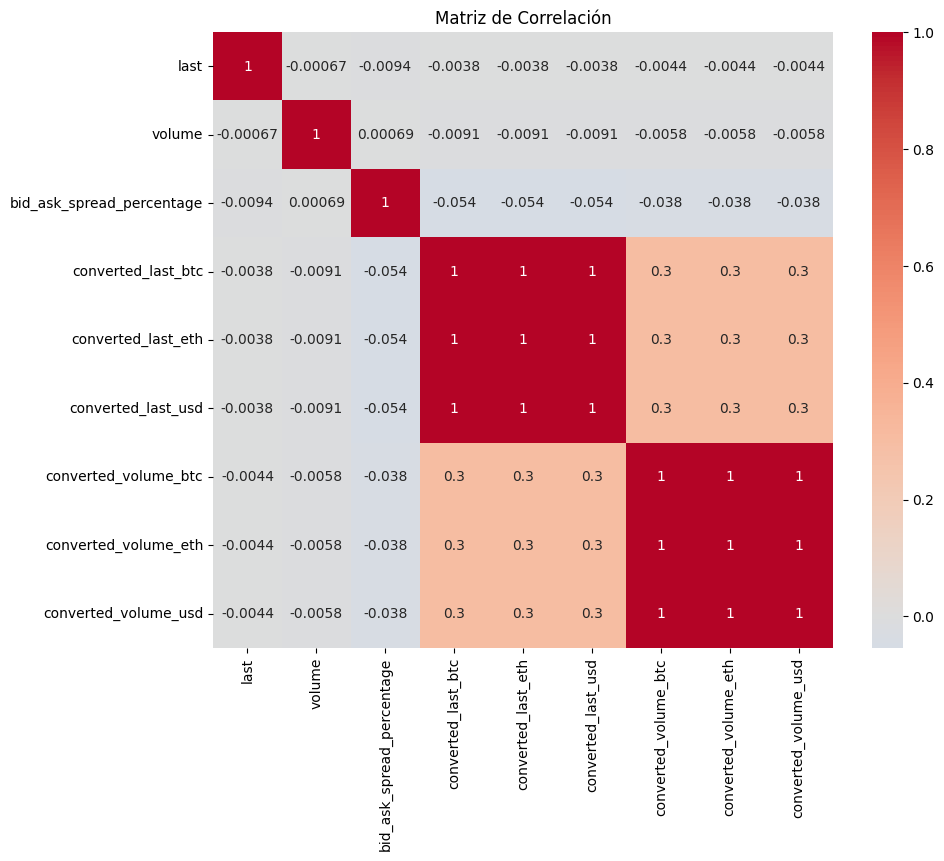

In [123]:
numeric_columns = tickers_resume_df.select_dtypes(include=['float64', 'int64','int32','float32'])  # Seleccionar solo columnas numéricas
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()


________________________________

### algunos experimentos para el merge, timestamp mas proximo

In [42]:
# Realizar el merge
merged_result = pd.merge(merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df, tickers_resume_df, on=["crip_id"])

In [124]:
# Imprimir el resultado
merged_result.head(5)

,crip_id,timestamp_x,open_price,high_price,low_price,close_price,price,market_cap,total_volume,open_price_change,high_price_change,low_price_change,close_price_change,price_change,market_cap_change,total_volume_change,block_time_in_minutes,sentiment_votes_up_percentage,sentiment_votes_down_percentage,watchlist_portfolio_users,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,asset_platform_id,public_notice,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp_y,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,binancecoin,2023-07-25 00:00:00,238.46732,238.46732,238.46732,238.46732,238.96549,3.721616e+10,512795360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,57.45,42.55,642873,4.0,5.0,65.446,73.082,61.771,73.073,11.364,2023-08-23 22:02:24.937000+00:00,NaN,NaN,bnb,usdt,216.20,78282.957000,green,0.046253,2023-08-24 01:56:46,2023-08-24 01:56:46,2023-08-24 01:56:46,False,False,not founded trade_url #404,not founded token_info_url #404,tether,p2b,p2pb2b,0.008200,0.129231,216.31,641.919000,10117.000,16933273.0
1,binancecoin,2023-07-25 00:00:00,238.46732,238.46732,238.46732,238.46732,238.96549,3.721616e+10,512795360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,57.45,42.55,642873,4.0,5.0,65.446,73.082,61.771,73.073,11.364,2023-08-23 22:02:24.937000+00:00,NaN,NaN,bnb,usdt,216.31,43388.429840,green,0.019246,2023-08-24 01:57:31,2023-08-24 01:57:31,2023-08-24 01:57:31,False,False,https://dashboard.azbit.com/exchange/bnb_usdt,not founded token_info_url #404,tether,azbit,azbit,0.008204,0.129297,216.26,354.678000,5590.000,9349370.0
2,binancecoin,2023-07-25 00:00:00,238.46732,238.46732,238.46732,238.46732,238.96549,3.721616e+10,512795360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,57.45,42.55,642873,4.0,5.0,65.446,73.082,61.771,73.073,11.364,2023-08-23 22:02:24.937000+00:00,NaN,NaN,bnb,usdt,216.10,4743.360000,green,0.046253,2023-08-24 01:56:56,2023-08-24 01:56:56,2023-08-24 01:56:56,False,False,https://www.mexc.com/exchange/bnb_usdt,not founded token_info_url #404,tether,mexc,mxc,0.008196,0.129171,216.21,38.877508,612.704,1025555.0
3,binancecoin,2023-07-25 00:00:00,238.46732,238.46732,238.46732,238.46732,238.96549,3.721616e+10,512795360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,57.45,42.55,642873,4.0,5.0,65.446,73.082,61.771,73.073,11.364,2023-08-23 22:02:24.937000+00:00,NaN,NaN,bnb,usdt,216.10,542489.144000,green,0.046253,2023-08-24 01:58:39,2023-08-24 01:58:39,2023-08-24 01:58:39,False,False,https://www.binance.com/en/trade/bnb_usdt?ref=...,not founded token_info_url #404,tether,binance,binance,0.008196,0.129171,216.21,4436.000000,69914.000,117022590.0
4,binancecoin,2023-07-25 00:00:00,238.46732,238.46732,238.46732,238.46732,238.96549,3.721616e+10,512795360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,57.45,42.55,642873,4.0,5.0,65.446,73.082,61.771,73.073,11.364,2023-08-23 22:02:24.937000+00:00,NaN,NaN,bnb,usdt,216.07,29547.163212,green,0.060130,2023-08-24 01:58:35,2023-08-24 01:58:35,2023-08-24 01:58:35,False,False,https://bingx.com/en-us/spot/bnbusdt,not founded token_info_url #404,tether,bingx,bingx,0.008195,0.129153,216.18,241.592000,3807.000,6372776.0


In [125]:
merged_result.shape

(59348, 52)

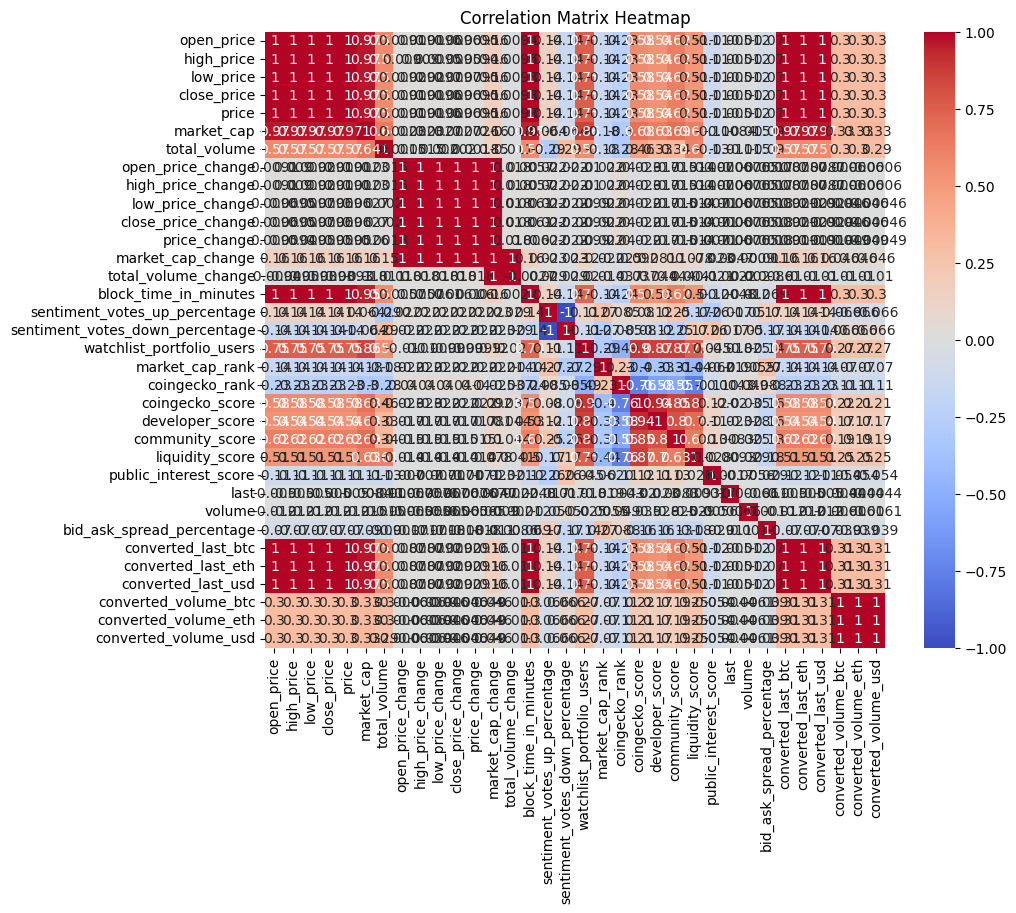

In [126]:
# Seleccionar solo las columnas numéricas para el cálculo de correlación
numeric_columns = merged_result.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [46]:
merged_result.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/merged_result.csv', mode='w', index=False)

________________________________________

### top_criptos_df:

In [47]:
top_criptos_df.head(15)

,crip_id,market_cap_percentage,total_market_cap,total_volume
0,btc,46.468139,4.189143e+07,1.683411e+06
1,eth,18.209048,6.602904e+08,2.653383e+07
2,bnb,3.006733,5.111953e+09,2.054243e+08
3,xrp,2.522814,2.096658e+12,8.425440e+10


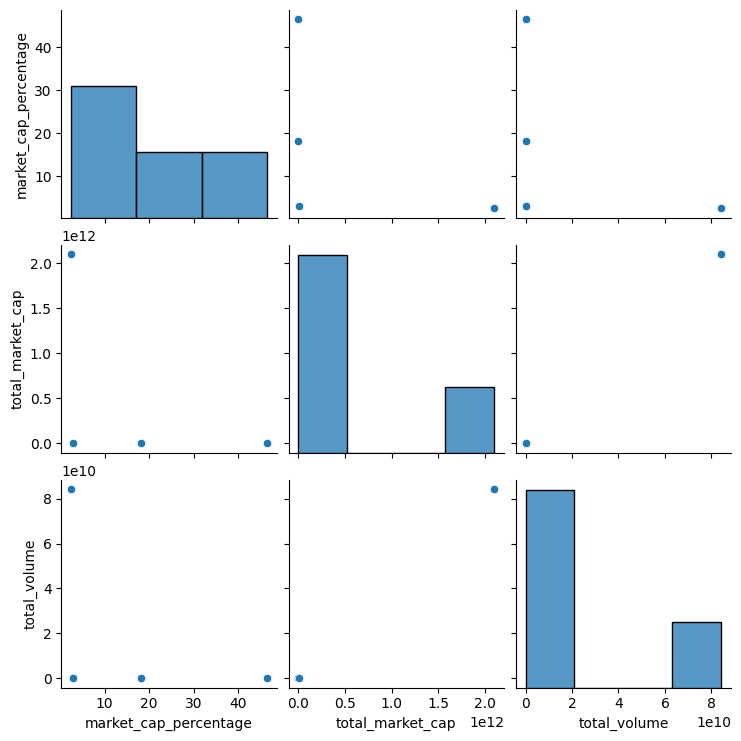

In [48]:
sns.pairplot(top_criptos_df)